In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [63]:
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)

In [64]:
train_df=pd.read_csv("D:\\machine learning projecsts folders\\realstate\\missing imputation\\gurgaon_properties_value_imputation")

In [65]:
train_df.sample(4)

property_type      sector  price  bedRoom  bathroom balcony  noOfFloor  \
266           Flat   sector 82   1.25      3.0       4.0      3+        8.0   
3450          Flat  sector 113   6.00      5.0       6.0      3+       24.0   
2128          Flat   sector 85   1.09      2.0       2.0       3        9.0   
50            Flat   sector 84   1.24      3.0       3.0       3        8.0   

           agePossession  built_up_area  others  pooja room  servant room  \
266   Under Construction         1773.0       0           0             0   
3450      Moderately Old         7294.0       0           0             0   
2128      Relatively New         1638.0       0           0             0   
50        Relatively New         1650.0       0           0             0   

      store room  study room  furnishing_type  luxury_score  
266            0           0                0            54  
3450           0           0                0           117  
2128           1           0                0           174  
50             0           1                2           158

# luxury_score

<Axes: xlabel='luxury_score', ylabel='Count'>

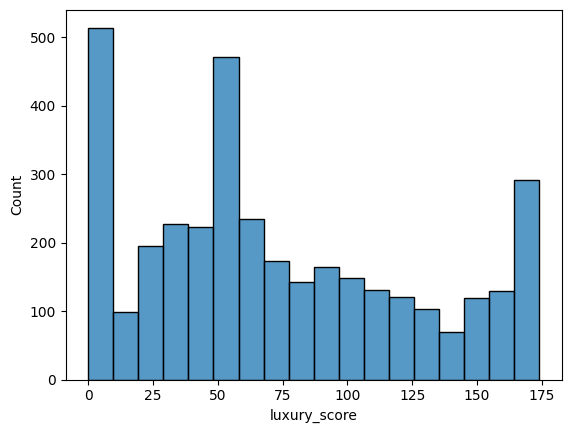

In [66]:
sns.histplot(train_df['luxury_score'])

In [67]:
train_df['luxury_score'].describe()

count    3555.000000
mean       72.440788
std        53.097341
min         0.000000
25%        34.000000
50%        60.000000
75%       111.000000
max       174.000000
Name: luxury_score, dtype: float64

changing the luxury score into catogorical column with the name of low ,meddium,high


In [68]:
def change_luxury_score(score):
    if 0 <= score < 50:
        return "Low"
    elif 50 <= score < 150:
        return "Medium"
    elif 150 <= score <= 175:
        return "High"
    else:
        return None  # or "Undefined" or any other label for scores outside the defined bin

In [69]:
train_df['luxury_cat']=train_df['luxury_score'].apply(change_luxury_score)

In [70]:
train_df.sample()

property_type      sector  price  bedRoom  bathroom balcony  noOfFloor  \
3513          Flat  sector 37c   0.78      2.0       2.0       3        1.0   

       agePossession  built_up_area  others  pooja room  servant room  \
3513  Moderately Old         1068.1       0           0             0   

      store room  study room  furnishing_type  luxury_score luxury_cat  
3513           0           0                2           103     Medium

change the floor number into cat columns 


<Axes: ylabel='Frequency'>

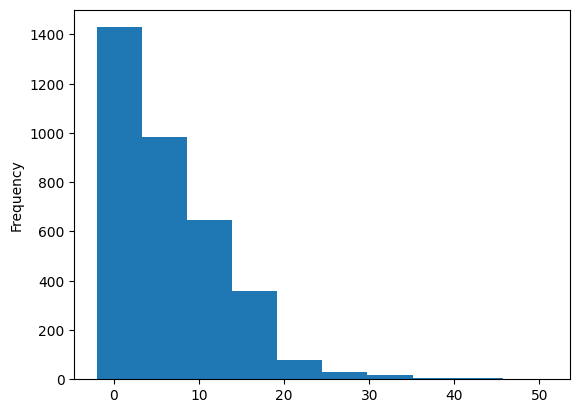

In [71]:
train_df['noOfFloor'].plot(kind='hist')

In [72]:
def change_floor(row):
    if 0<=row<5:
        return 'lower'
    elif 5<=row<15:
        return "mid"
    elif 15<=row<51:
        return 'high'
    else:
        return None
        

In [73]:
train_df['floor catt']=train_df['noOfFloor'].apply(change_floor)

In [74]:
train_df.sample(4)[['noOfFloor','floor catt']]

noOfFloor floor catt
2658        9.0        mid
3044        1.0      lower
35          5.0        mid
1971        4.0      lower

In [75]:
train_df.sample(4)

property_type      sector  price  bedRoom  bathroom balcony  noOfFloor  \
650           Flat  sector 107   1.15      2.0       2.0       3        0.0   
2612          Flat   sector 72   1.90      3.0       3.0       3       10.0   
838           Flat   sector 79   1.85      3.0       4.0      3+       11.0   
2666          Flat   sector 90   1.80      4.0       4.0      3+        7.0   

       agePossession  built_up_area  others  pooja room  servant room  \
650   Relatively New    2561.333333       0           0             0   
2612  Relatively New    1975.000000       0           0             0   
838     New Property    1945.000000       0           0             1   
2666  Moderately Old    2004.000000       0           0             0   

      store room  study room  furnishing_type  luxury_score luxury_cat  \
650            0           1                0            29        Low   
2612           0           0                0             0        Low   
838            0           0                0            49        Low   
2666           0           0                0            38        Low   

     floor catt  
650       lower  
2612        mid  
838         mid  
2666        mid

droping these features as we dont want the user to say that they want 34 floor and soo on a. and also removing luxury score as it does not want the user to guess the luxury score thats why we  created a new columns with the cat columns and droping the rest 

In [76]:
train_df.drop(columns=['noOfFloor','luxury_score'],inplace=True)

In [77]:
train_df.sample()

property_type     sector  price  bedRoom  bathroom balcony  \
566          Flat  sector 91   0.95      2.0       2.0       2   

      agePossession  built_up_area  others  pooja room  servant room  \
566  Relatively New         1185.0       0           0             0   

     store room  study room  furnishing_type luxury_cat floor catt  
566           0           0                0     Medium        mid

In [78]:
from sklearn.preprocessing import OrdinalEncoder
data_label_encoded = train_df.copy()
categorical_cols = train_df.select_dtypes(include=['object']).columns
# Apply label encoding to categorical columns
for col in categorical_cols:
    oe = OrdinalEncoder()
    data_label_encoded[col] = oe.fit_transform(data_label_encoded[[col]])
    print(oe.categories_)

# Splitting the dataset into training and testing sets
X_label = data_label_encoded.drop('price', axis=1)
y_label = data_label_encoded['price']

[array(['Flat', 'House'], dtype=object)]
[array(['dwarka expressway', 'gwal pahari', 'manesar', 'new',
       'new sector 2', 'sector 1', 'sector 102', 'sector 103',
       'sector 104', 'sector 105', 'sector 106', 'sector 107',
       'sector 108', 'sector 109', 'sector 10a', 'sector 11',
       'sector 110', 'sector 111', 'sector 112', 'sector 113',
       'sector 12', 'sector 13', 'sector 14', 'sector 15', 'sector 17',
       'sector 17a', 'sector 17b', 'sector 2', 'sector 21', 'sector 22',
       'sector 23', 'sector 24', 'sector 25', 'sector 26', 'sector 27',
       'sector 28', 'sector 3', 'sector 3 phase 2',
       'sector 3 phase 3 extension', 'sector 30', 'sector 31',
       'sector 33', 'sector 36', 'sector 36a', 'sector 37', 'sector 37c',
       'sector 37d', 'sector 38', 'sector 39', 'sector 4', 'sector 40',
       'sector 41', 'sector 43', 'sector 45', 'sector 46', 'sector 47',
       'sector 48', 'sector 49', 'sector 5', 'sector 50', 'sector 51',
       'sector 52', 'sect

# feature engineering

<Axes: >

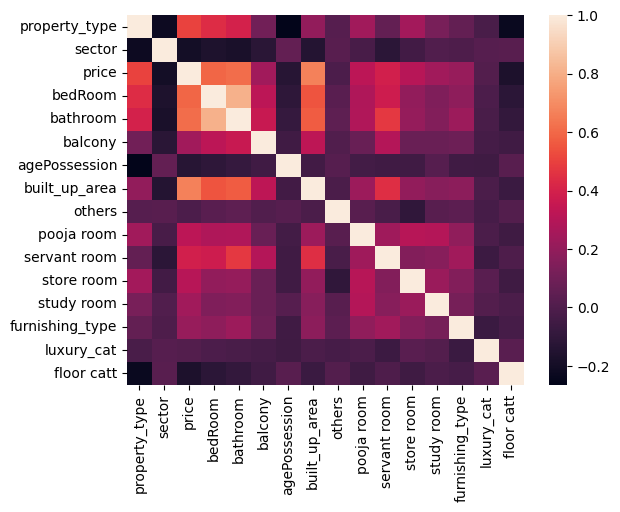

In [79]:
sns.heatmap(data_label_encoded.corr())

In [80]:
fi_df1 = data_label_encoded.corr()['price'].iloc[1:].to_frame().reset_index().rename(columns={'index':'col_name','price':'corr0'})\
    .sort_values('corr0',ascending=False)
fi_df1

col_name     corr0
1             price  1.000000
6     built_up_area  0.667010
3          bathroom  0.609836
2           bedRoom  0.591352
9      servant room  0.392015
8        pooja room  0.319908
10       store room  0.305712
11       study room  0.243021
4           balcony  0.238991
12  furnishing_type  0.212857
13       luxury_cat  0.009861
7            others -0.012998
5     agePossession -0.133213
14       floor catt -0.170353
0            sector -0.198391

using random forest feature importance or any tree base featire imprtance 

In [81]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=100,random_state=42)
model.fit(X_label,y_label)


RandomForestRegressor(random_state=42)

In [82]:
fi_rf=pd.DataFrame({
    "col_name":X_label.columns,
    "corr1":model.feature_importances_
}).sort_values("corr1",ascending=False)
fi_rf

col_name     corr1
6     built_up_area  0.422994
2           bedRoom  0.165963
0     property_type  0.156153
1            sector  0.113820
3          bathroom  0.044509
9      servant room  0.017916
5     agePossession  0.015251
4           balcony  0.014940
12  furnishing_type  0.008761
11       study room  0.008427
10       store room  0.008340
13       luxury_cat  0.007645
8        pooja room  0.006978
14       floor catt  0.005000
7            others  0.003304

using gradient boost

In [83]:
from sklearn.ensemble import GradientBoostingRegressor
model2=GradientBoostingRegressor()
model2.fit(X_label,y_label)

GradientBoostingRegressor()

In [84]:
fi_gb=pd.DataFrame({
    "col_name":X_label.columns,
    "corr2":model2.feature_importances_
}).sort_values("corr2",ascending=False)
fi_gb

col_name     corr2
6     built_up_area  0.402267
2           bedRoom  0.217777
0     property_type  0.146331
1            sector  0.119584
3          bathroom  0.064636
9      servant room  0.025583
5     agePossession  0.004457
8        pooja room  0.004111
10       store room  0.004023
4           balcony  0.003244
11       study room  0.003181
12  furnishing_type  0.002176
14       floor catt  0.002061
7            others  0.000432
13       luxury_cat  0.000137

In [85]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_label,y_label,random_state=42,test_size=0.2)
model3=RandomForestRegressor(n_estimators=100,random_state=42)
model3.fit(x_train,y_train)
perm_imp=permutation_importance(model3,x_test,y_test,n_repeats=30,n_jobs=-1,random_state=42)

In [86]:
fi_pi=pd.DataFrame({
    "col_name":X_label.columns,
    "corr3":perm_imp.importances_mean
}).sort_values("corr3",ascending=False)
fi_pi

col_name     corr3
6     built_up_area  0.521986
0     property_type  0.189773
1            sector  0.173303
2           bedRoom  0.038665
9      servant room  0.019684
3          bathroom  0.015483
4           balcony  0.009569
5     agePossession  0.006476
13       luxury_cat  0.003949
11       study room  0.002800
14       floor catt  0.000663
12  furnishing_type  0.000637
8        pooja room -0.000078
7            others -0.000091
10       store room -0.002315

lasso coff

In [87]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
st=StandardScaler()
x_train_1=st.fit_transform(X_label)

In [88]:
model4=Lasso(alpha=0.01,random_state=41)
model4.fit(x_train_1,y_label)

Lasso(alpha=0.01, random_state=41)

In [89]:
fi_lasso=pd.DataFrame({
    "col_name":X_label.columns,
    "corr4":model4.coef_
}).sort_values("corr4",ascending=False)
fi_lasso

col_name     corr4
6     built_up_area  1.229077
0     property_type  0.798020
3          bathroom  0.353886
11       study room  0.183234
9      servant room  0.181414
10       store room  0.178938
2           bedRoom  0.154362
12  furnishing_type  0.097497
8        pooja room  0.096506
13       luxury_cat  0.074091
5     agePossession -0.015048
7            others -0.022637
1            sector -0.078053
4           balcony -0.093064
14       floor catt -0.120714

In [90]:
# using linear regrstion model and first scaling the model
from sklearn.linear_model import LinearRegression
lg_reg=LinearRegression()
lg_reg.fit(x_train_1,y_label)

LinearRegression()

In [91]:
fi_leg=pd.DataFrame({
    "col_name":X_label.columns,
    "corr5":lg_reg.coef_
}).sort_values("corr5",ascending=False)
fi_leg

col_name     corr5
6     built_up_area  1.233572
0     property_type  0.798189
3          bathroom  0.356428
11       study room  0.190116
9      servant room  0.187759
10       store room  0.181539
2           bedRoom  0.156591
12  furnishing_type  0.104346
8        pooja room  0.099188
13       luxury_cat  0.084103
5     agePossession -0.023075
7            others -0.031984
1            sector -0.087210
4           balcony -0.111200
14       floor catt -0.129912

In [92]:
from sklearn.feature_selection import RFE

# Initialize the base estimator
estimator = RandomForestRegressor()

# Apply RFE on the label-encoded and standardized training data
selector_label = RFE(estimator, n_features_to_select=X_label.shape[1], step=1)
selector_label = selector_label.fit(X_label, y_label)

# Get the selected features based on RFE
selected_features = X_label.columns[selector_label.support_]

# Extract the coefficients for the selected features from the underlying linear regression model
selected_coefficients = selector_label.estimator_.feature_importances_

# Organize the results into a DataFrame
fi_df6 = pd.DataFrame({
    'col_name': selected_features,
    'corr6': selected_coefficients
}).sort_values(by='corr6', ascending=False)

fi_df6

col_name     corr6
6     built_up_area  0.420977
2           bedRoom  0.171801
0     property_type  0.152757
1            sector  0.114321
3          bathroom  0.042129
9      servant room  0.018280
5     agePossession  0.015795
4           balcony  0.013482
11       study room  0.009840
12  furnishing_type  0.009190
10       store room  0.008303
13       luxury_cat  0.008173
8        pooja room  0.006288
14       floor catt  0.005022
7            others  0.003644

In [93]:
# import shap

# # Compute SHAP values using the trained Random Forest model
# rf = RandomForestRegressor(n_estimators=100, random_state=42)
# rf.fit(x_train_1, y_label)

# explainer = shap.TreeExplainer(rf)
# shap_values = explainer.shap_values(x_train_1)

# # Summing the absolute SHAP values across all samples to get an overall measure of feature importance
# shap_sum = np.abs(shap_values).mean(axis=0)

# shap_values

using feature selection method provided in the sklearn lb

In [94]:
# from sklearn.feature_selection import VarianceThreshold

# # Initialize VarianceThreshold
# vt = VarianceThreshold(threshold=0.8 * (1 - 0.8))  # 0.16

# # Fit on the feature data
# vt.fit(X_label)

# # Get selected columns
# selected_cols = X_label.columns[vt.get_support()]
# print("Selected columns:")
# print(selected_cols)

# # Get removed columns
# removed_cols = X_label.columns[~vt.get_support()]
# print("\nRemoved columns:")
# print(removed_cols)


univarirent feature selction using kbest and classif

or regression: r_regression, f_regression, mutual_info_regression

For classification: chi2, f_classif, mutual_info_classif

In [95]:
# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import r_regression
# kbest=SelectKBest(r_regression,k=11)
# kbest.fit_transform(x_train_1,y_label)

In [96]:
# selected_c=X_label.columns[kbest.get_support()]
# selected_c

In [97]:
# notselected_c=X_label.columns[~kbest.get_support()]
# notselected_c

In [98]:
# from sklearn.ensemble import ExtraTreesRegressor
# from sklearn.feature_selection import SelectFromModel
# clf = ExtraTreesRegressor(n_estimators=50)
# clf = clf.fit(X_label, y_label)
# clf.feature_importances_
# model = SelectFromModel(clf, prefit=True)
# X_new = model.traansform(X_label)
# X_new.shape

In [99]:
# selected_c=X_label.columns[model.get_support()]
# selected_c

In [100]:
# clf.feature_importances_

In [101]:
# fi=pd.DataFrame({
#     "col_name":X_label.columns,
#     "corr":clf.feature_importances_
# }).sort_values("corr",ascending=False)
# fi

In [102]:
fi_total=fi_df1.merge(fi_gb,on="col_name").merge(fi_lasso,on='col_name').merge(fi_pi,on='col_name').merge(fi_df6,on='col_name').merge(fi_leg,\
    on='col_name').merge(fi_rf,on='col_name').set_index('col_name')

In [103]:
fi_total

corr0     corr2     corr4     corr3     corr6     corr5  \
col_name                                                                      
built_up_area    0.667010  0.402267  1.229077  0.521986  0.420977  1.233572   
bathroom         0.609836  0.064636  0.353886  0.015483  0.042129  0.356428   
bedRoom          0.591352  0.217777  0.154362  0.038665  0.171801  0.156591   
servant room     0.392015  0.025583  0.181414  0.019684  0.018280  0.187759   
pooja room       0.319908  0.004111  0.096506 -0.000078  0.006288  0.099188   
store room       0.305712  0.004023  0.178938 -0.002315  0.008303  0.181539   
study room       0.243021  0.003181  0.183234  0.002800  0.009840  0.190116   
balcony          0.238991  0.003244 -0.093064  0.009569  0.013482 -0.111200   
furnishing_type  0.212857  0.002176  0.097497  0.000637  0.009190  0.104346   
luxury_cat       0.009861  0.000137  0.074091  0.003949  0.008173  0.084103   
others          -0.012998  0.000432 -0.022637 -0.000091  0.003644 -0.031984   
agePossession   -0.133213  0.004457 -0.015048  0.006476  0.015795 -0.023075   
floor catt      -0.170353  0.002061 -0.120714  0.000663  0.005022 -0.129912   
sector          -0.198391  0.119584 -0.078053  0.173303  0.114321 -0.087210   

                    corr1  
col_name                   
built_up_area    0.422994  
bathroom         0.044509  
bedRoom          0.165963  
servant room     0.017916  
pooja room       0.006978  
store room       0.008340  
study room       0.008427  
balcony          0.014940  
furnishing_type  0.008761  
luxury_cat       0.007645  
others           0.003304  
agePossession    0.015251  
floor catt       0.005000  
sector           0.113820

In [104]:
fi_total.divide(fi_total.sum(axis=0),axis=1)

corr0     corr2     corr4     corr3     corr6     corr5  \
col_name                                                                      
built_up_area    0.216871  0.471221  0.553766  0.660130  0.496878  0.558112   
bathroom         0.198281  0.075715  0.159445  0.019581  0.049725  0.161261   
bedRoom          0.192271  0.255107  0.069548  0.048898  0.202776  0.070847   
servant room     0.127459  0.029968  0.081737  0.024893  0.021575  0.084949   
pooja room       0.104015  0.004816  0.043481 -0.000099  0.007422  0.044876   
store room       0.099399  0.004713  0.080621 -0.002927  0.009800  0.082135   
study room       0.079016  0.003726  0.082557  0.003541  0.011614  0.086015   
balcony          0.077705  0.003800 -0.041930  0.012102  0.015912 -0.050311   
furnishing_type  0.069208  0.002549  0.043928  0.000806  0.010847  0.047210   
luxury_cat       0.003206  0.000160  0.033382  0.004994  0.009646  0.038051   
others          -0.004226  0.000506 -0.010199 -0.000115  0.004301 -0.014471   
agePossession   -0.043313  0.005221 -0.006780  0.008190  0.018642 -0.010440   
floor catt      -0.055388  0.002414 -0.054388  0.000838  0.005927 -0.058777   
sector          -0.064505  0.140083 -0.035167  0.219167  0.134933 -0.039457   

                    corr1  
col_name                   
built_up_area    0.501269  
bathroom         0.052745  
bedRoom          0.196674  
servant room     0.021231  
pooja room       0.008269  
store room       0.009884  
study room       0.009986  
balcony          0.017705  
furnishing_type  0.010382  
luxury_cat       0.009059  
others           0.003915  
agePossession    0.018074  
floor catt       0.005926  
sector           0.134882

In [105]:
fi_total[['corr0','corr1','corr2',"corr3","corr4",'corr5','corr6']].mean(axis=1).sort_values(ascending=False)

col_name
built_up_area      0.699698
bedRoom            0.213787
bathroom           0.212415
servant room       0.120379
store room         0.097791
study room         0.091517
pooja room         0.076129
furnishing_type    0.062209
luxury_cat         0.026851
sector             0.022482
balcony            0.010852
others            -0.008619
agePossession     -0.018480
floor catt        -0.058319
dtype: float64

In [106]:
X_label.head()

property_type  sector  bedRoom  bathroom  balcony  agePossession  \
0            0.0    80.0      4.0       4.0      0.0            3.0   
1            0.0    99.0      2.0       2.0      1.0            1.0   
2            0.0   113.0      2.0       2.0      2.0            4.0   
3            0.0   105.0      3.0       3.0      3.0            3.0   
4            0.0    59.0      3.0       3.0      2.0            3.0   

   built_up_area  others  pooja room  servant room  store room  study room  \
0         2186.0       0           0             0           0           0   
1         1484.0       0           0             0           0           0   
2          561.0       0           0             0           0           0   
3         1817.0       0           0             1           0           0   
4         1894.0       0           1             0           0           0   

   furnishing_type  luxury_cat  floor catt  
0                0         2.0         2.0  
1                0         2.0         0.0  
2                0         1.0         2.0  
3                0         0.0         2.0  
4                2         2.0         2.0

In [107]:
from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label, y_label, cv=5, scoring='r2')
scores.mean()

np.float64(0.7911552824091947)

to dropcertain columns we need to prove that these are not as valueable in the dataset so we need to prove that 


In [108]:
X_label

property_type  sector  bedRoom  bathroom  balcony  agePossession  \
0               0.0    80.0      4.0       4.0      0.0            3.0   
1               0.0    99.0      2.0       2.0      1.0            1.0   
2               0.0   113.0      2.0       2.0      2.0            4.0   
3               0.0   105.0      3.0       3.0      3.0            3.0   
4               0.0    59.0      3.0       3.0      2.0            3.0   
5               0.0    99.0      4.0       4.0      3.0            1.0   
6               0.0    94.0      3.0       3.0      3.0            3.0   
7               0.0   111.0      3.0       5.0      2.0            1.0   
8               0.0    99.0      3.0       4.0      1.0            3.0   
9               0.0    99.0      2.0       2.0      2.0            3.0   
10              0.0    56.0      3.0       3.0      0.0            3.0   
11              0.0    20.0      3.0       3.0      1.0            3.0   
12              0.0    99.0      4.0       5.0      3.0            3.0   
13              0.0   105.0      3.0       3.0      3.0            3.0   
14              0.0     6.0      3.0       3.0      3.0            3.0   
15              0.0    89.0      3.0       3.0      2.0            1.0   
16              0.0    12.0      3.0       2.0      4.0            3.0   
17              0.0    99.0      2.0       2.0      2.0            3.0   
18              1.0    21.0     10.0      10.0      1.0            2.0   
19              0.0    71.0      2.0       2.0      1.0            1.0   
20              0.0    95.0      3.0       3.0      2.0            3.0   
21              0.0    59.0      3.0       3.0      3.0            0.0   
22              0.0    71.0      3.0       4.0      3.0            4.0   
23              0.0    75.0      3.0       4.0      3.0            3.0   
24              0.0    97.0      2.0       2.0      1.0            3.0   
25              0.0    45.0      3.0       4.0      2.0            3.0   
26              1.0    47.0      3.0       3.0      1.0            3.0   
27              1.0    71.0      3.0       3.0      2.0            4.0   
28              0.0    63.0      3.0       4.0      3.0            3.0   
29              0.0    61.0      5.0       5.0      3.0            0.0   
30              0.0    98.0      4.0       4.0      3.0            3.0   
31              0.0   107.0      1.0       1.0      0.0            3.0   
32              1.0    32.0      5.0       4.0      2.0            2.0   
33              0.0    99.0      3.0       4.0      2.0            3.0   
34              0.0   113.0      2.0       2.0      1.0            4.0   
35              0.0    35.0      3.0       4.0      2.0            2.0   
36              0.0    87.0      2.0       2.0      3.0            3.0   
37              0.0     9.0      3.0       2.0      0.0            0.0   
38              0.0    97.0      2.0       2.0      1.0            3.0   
39              0.0   113.0      2.0       2.0      1.0            1.0   
40              0.0    13.0      3.0       3.0      3.0            3.0   
41              0.0    96.0      3.0       3.0      3.0            3.0   
42              0.0    63.0      3.0       4.0      2.0            3.0   
43              0.0    99.0      2.0       2.0      2.0            3.0   
44              0.0    89.0      3.0       4.0      3.0            1.0   
45              0.0    62.0      3.0       4.0      3.0            3.0   
46              0.0    99.0      3.0       3.0      1.0            3.0   
47              0.0     8.0      3.0       4.0      3.0            1.0   
48              0.0   113.0      2.0       2.0      1.0            1.0   
49              0.0   103.0      3.0       2.0      4.0            1.0   
50              0.0    98.0      3.0       3.0      2.0            3.0   
51              0.0    65.0      4.0       3.0      3.0            2.0   
52              0.0   113.0      1.0       1.0      4.0            3.0   
53        

In [109]:
categorical_cols

Index(['property_type', 'sector', 'balcony', 'agePossession', 'luxury_cat',
       'floor catt'],
      dtype='object')

In [110]:
for i in categorical_cols:
    X_label[i]=train_df[i]

In [111]:
X_label['built_up_area']=round(X_label['built_up_area'])

In [112]:
X_label

property_type                      sector  bedRoom  bathroom balcony  \
0             Flat                   sector 69      4.0       4.0       1   
1             Flat                   sector 85      2.0       2.0       2   
2             Flat                  sohna road      2.0       2.0       3   
3             Flat                   sector 90      3.0       3.0      3+   
4             Flat                   sector 50      3.0       3.0       3   
5             Flat                   sector 85      4.0       4.0      3+   
6             Flat                   sector 81      3.0       3.0      3+   
7             Flat                  sector 99a      3.0       5.0       3   
8             Flat                   sector 85      3.0       4.0       2   
9             Flat                   sector 85      2.0       2.0       3   
10            Flat                   sector 48      3.0       3.0       1   
11            Flat                   sector 12      3.0       3.0       2   
12            Flat                   sector 85      4.0       5.0      3+   
13            Flat                   sector 90      3.0       3.0      3+   
14            Flat                  sector 102      3.0       3.0      3+   
15            Flat                   sector 77      3.0       3.0       3   
16            Flat                  sector 108      3.0       2.0      No   
17            Flat                   sector 85      2.0       2.0       3   
18           House                   sector 13     10.0      10.0       2   
19            Flat                   sector 61      2.0       2.0       2   
20            Flat                   sector 82      3.0       3.0       3   
21            Flat                   sector 50      3.0       3.0      3+   
22            Flat                   sector 61      3.0       4.0      3+   
23            Flat                   sector 65      3.0       4.0      3+   
24            Flat                   sector 83      2.0       2.0       2   
25            Flat                  sector 37c      3.0       4.0       3   
26           House                   sector 38      3.0       3.0       2   
27           House                   sector 61      3.0       3.0       3   
28            Flat                   sector 54      3.0       4.0      3+   
29            Flat                   sector 52      5.0       5.0      3+   
30            Flat                   sector 84      4.0       4.0      3+   
31            Flat                   sector 92      1.0       1.0       1   
32           House                   sector 25      5.0       4.0       3   
33            Flat                   sector 85      3.0       4.0       3   
34            Flat                  sohna road      2.0       2.0       2   
35            Flat                   sector 28      3.0       4.0       3   
36            Flat                   sector 74      2.0       2.0      3+   
37            Flat                  sector 105      3.0       2.0       1   
38            Flat                   sector 83      2.0       2.0       2   
39            Flat                  sohna road      2.0       2.0       2   
40            Flat                  sector 109      3.0       3.0      3+   
41            Flat                  sector 82a      3.0       3.0      3+   
42            Flat                   sector 54      3.0       4.0       3   
43            Flat                   sector 85      2.0       2.0       3   
44            Flat                   sector 77      3.0       4.0      3+   
45            Flat                   sector 53      3.0       4.0      3+   
46            Flat                   sector 85      3.0       3.0       2   
47            Flat                  sector 104      3.0       4.0      3+   
48            Flat                  sohna road      2.0       2.0       2   
49            Flat                   sector 89      3.0       2.0      No   
50            Flat                   sector 84      3.0       3.0       3   
5

In [113]:
export_df = X_label.drop(columns=['pooja room', 'study room', 'others'])
export_df['price'] = y_label
export_df.to_csv('gurgaon_properties_post_feature_selection.csv', index=False)